need to install all these dependencies
pip/pip3 install keras
pip/pip3 install matplotlib
pip/pip3 install numpy
pip/pip3 install tensorflow

In [1]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
import matplotlib.pyplot as plot
import numpy as np
import random
import time

Using TensorFlow backend.


Import the mnist data set and ensure the data is shaped properly.
The original data is a (28, 28) pixel greyscale image. We need to flatten it for the network.
Need a 1 dimensional array for the input (784, ) and a 1 dimensional array for the output (10,) but we have 60,000 data points. So we end up with (60000, 784) and (60000, 10)

In [2]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Just to show you what the data looks like

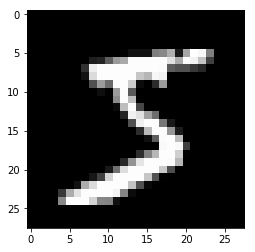

In [3]:
plot.imshow(x_train[0].reshape(28, 28), cmap='gray')
plot.show()

We are using a fully connected feed forward neural network - "Sequential" makes it feed forward, "Dense" makes it fully connected.

We're using a relu (rectified linear units)[https://en.wikipedia.org/wiki/Rectifier_(neural_networks)] activation in the hidden layer - it's often recommended for hidden layers in image based problems - not sure why :P

We're using softmax in the final layer - it's similar to relu. For some reason, if you replace softmax with relu then the loss will be nan most of the time - not sure why

Categorical Crossentropy [https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/] is used as the loss function. I think it's the de-facto loss function for categorisation problems. MSE is used in linear regression but is not suitable for categorisation

The optimizer is RMSProp - Stochastic Gradient Descent caused problems for some reason

Accuracy is added as a metric - it is simply the percentage of the training set that it guesses correctly. A random guesser we would expect to get 0.1 accuracy. A human, close to 1 accuracy

In [4]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="RMSProp",
             metrics=["accuracy"])

In [5]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 5.7192 - acc: 0.6370
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 3.6193 - acc: 0.7702
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 3.2704 - acc: 0.7934
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 3.1258 - acc: 0.8029
Epoch 5/50
60000/60000 [==============================] - 3s 50us/step - loss: 3.0208 - acc: 0.8097
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 3.0040 - acc: 0.8111
Epoch 7/50
60000/60000 [==============================] - 3s 48us/step - loss: 2.9351 - acc: 0.8157
Epoch 8/50
60000/60000 [==============================] - 3s 51us/step - loss: 2.8830 - acc: 0.8190
Epoch 9/50
60000/60000 [==============================] - 3s 54us/step - loss: 2.8289 - acc: 0.8223
Epoch 10/50
60000/60000 [==============================] - 3s 51us/step - loss: 2.7951 - acc: 0.8246

We evaluate the model against test data. If the accuracy and loss here are dramatically different to the training data, then we know that our model has overfitted to the training data and will not be useful in real world applications

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 36us/step


[0.89404272279227148, 0.94369999999999998]

This is just a demonstration of the predictive abilities of the trained network - highlight it and hit ctrl+enter to run it against a new random member from the data set

Prediction:  2
--------------


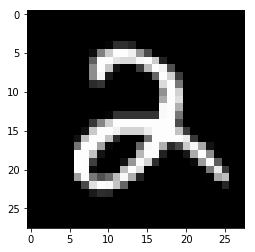

In [7]:
random_mnist_character = random.choice(x_train)
result = np.argmax(model.predict(np.array([random_mnist_character])))
print("Prediction: ", result)
print("--------------")

plot.imshow(random_mnist_character.reshape(28,28), cmap='gray')
plot.show()

Here is a bunch of quick comparisons of different optimizers. Lower loss, higher accuracy is better.

In [8]:
# Root Mean Square Propagation
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="RMSProp",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 7.3478 - acc: 0.5398
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 3.1768 - acc: 0.7992
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 2.8949 - acc: 0.8176
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 2.8092 - acc: 0.8235: 0s - los
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 2.6950 - acc: 0.8312
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 2.6723 - acc: 0.8325
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 2.6247 - acc: 0.8358
Epoch 8/10
60000/60000 [==============================] - 3s 49us/step - loss: 2.5949 - acc: 0.8376
Epoch 9/10
60000/60000 [==============================] - 3s 52us/step - loss: 2.5550 - acc: 0.8402
Epoch 10/10
10000/10000 [==============================] - 0s 23us/step
loss:  2.441656011

In [9]:
# Stochastic Gradient Descent
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 14.5251 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 14.5280 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 14.5280 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 14.5280 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 14.5280 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 14.5280 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 14.5280 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 3s 47us/step - loss: 14.5280 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 14.5280 - acc: 0.0987
Epoch 10/10
10000/10000 [==============================] - 0s 25us/step
loss:  14.573981651

In [10]:
# Adaptive Moment Estimation
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 9.2531 - acc: 0.4238
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 5.4843 - acc: 0.6572
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 3.2244 - acc: 0.7975
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 2.8642 - acc: 0.8203
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 2.7031 - acc: 0.8305
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 2.6579 - acc: 0.8337
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 2.6764 - acc: 0.8327
Epoch 8/10
60000/60000 [==============================] - 4s 58us/step - loss: 2.6205 - acc: 0.8363
Epoch 9/10
60000/60000 [==============================] - 4s 60us/step - loss: 2.2045 - acc: 0.8615
Epoch 10/10
10000/10000 [==============================] - 0s 27us/step
loss:  1.50709001517
accurac